In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([35, 40, 50, 60, 65, 70])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
y_train_pred = lin_regressor.predict(X_train)
y_test_pred = lin_regressor.predict(X_test)

In [6]:
print("Training set R²:", r2_score(y_train, y_train_pred))
print("Test set R²:", r2_score(y_test, y_test_pred))

Training set R²: 0.9657142857142857
Test set R²: -1.98


In [7]:
print("LinearRegression")
print("Train Mse :", mean_squared_error(y_train, y_train_pred))
print("Test Mse :", mean_squared_error(y_test, y_test_pred))

LinearRegression
Train Mse : 1.875
Test Mse : 18.625


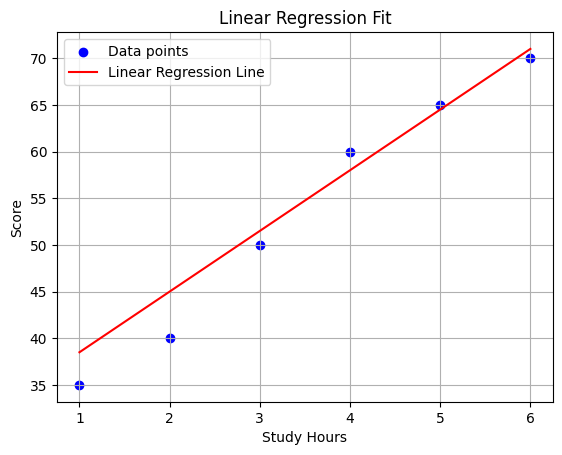

In [8]:
# vislualization
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, lin_regressor.predict(X), color='red', label='Linear Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
poly = PolynomialFeatures(degree=5)
X_poly_test = poly.fit_transform(X_test)
X_poly_train = poly.fit_transform(X_train)

overfit_model = LinearRegression()
overfit_model.fit(X_poly_train, y_train)
y_train_poly_pred = overfit_model.predict(X_poly_train)
y_test_poly_pred = overfit_model.predict(X_poly_test)

In [10]:
print("Training set R²:", r2_score(y_train, y_train_pred))
print("Test set R²:", r2_score(y_test, y_test_pred))
print("Overfitting Model")
print("Train Mse :", mean_squared_error(y_train, y_train_poly_pred))
print("Test Mse :", mean_squared_error(y_test, y_test_poly_pred))

Training set R²: 0.9657142857142857
Test set R²: -1.98
Overfitting Model
Train Mse : 8.23880018525583e-24
Test Mse : 17.882879121611595


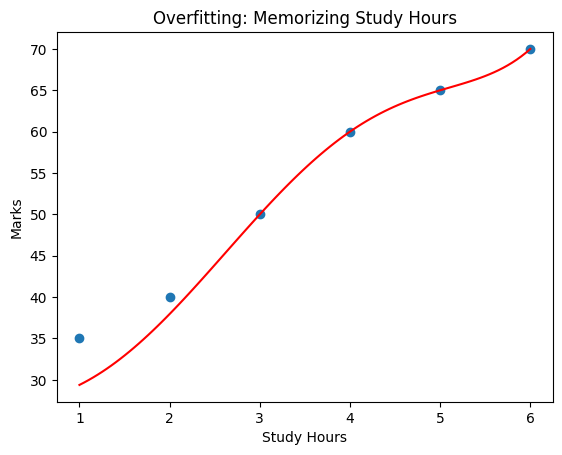

In [19]:
# vislualization
X_grid = np.linspace(1, 6, 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, overfit_model.predict(X_grid_poly), color='red')
plt.title("Overfitting: Memorizing Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [15]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

In [16]:
ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

y_ridge_pred = ridge.predict(X_poly)

from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred) )
print("Ridge R2 :", r2_score(y, y_ridge_pred))

Ridge MSE: 0.24058058055628095
Ridge R2 : 0.9985320506949108


In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

y_lasso_pred = lasso.predict(X_poly)

c:\Users\KIRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R2 :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred) )
print("Lasso R2 :", r2_score(y, y_lasso_pred))

Ridge MSE: 0.24058058055628095
Ridge R2 : 0.9985320506949108

Lasso MSE: 0.7727384155729596
Lasso R2 : 0.9952849859388768


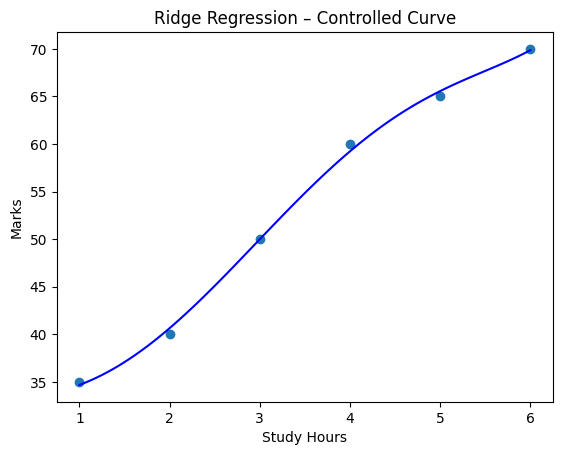

In [20]:
X_grid = np.linspace(1, 6, 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, ridge.predict(X_grid_poly), color='blue')
plt.title("Ridge Regression – Controlled Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()